<a href="https://colab.research.google.com/github/infi69/Hello-world/blob/master/DL_Assignment2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group No: 44

## Group Member Names:
1. VEMULA VASUDEVUDU (2021SC04939)
2.PANKAJ CHOUDHARY (2021SC04114)
3.ANANT KUMAR JAIN (2021SC04989)
4.TARUN GUPTA (2021SC04941)

## Journal used for the implemetation
**Journal title:** Convolutional Neural Networks Models for Facial Expression Recognition

**Authors:** Burhanudin Ramdhani, Esmeralda C. Djamal*, Ridwan Ilyas

**Journal Name:** Convolutional Neural Networks Models for Facial Expression Recognition

**Year:** 2018

# 1. Import the required libraries

In [1]:
##---------Type the code below this line------------------##

import sys
import os
import cv2
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 2. Data Acquisition

For the problem identified by you, students have to find the data source themselves from any data source.

Provide the URL of the data used.

Write Code for converting the above downloaded data into a form suitable for DL



In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                      title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                  Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57           4055        127  1.0              
nelgiriyewithana/global-youtube-statistics-2023          Global YouTube Statistics 2023                  60KB  2023-07-28 15:36:38          15308        516  1.0              
alitaqi000/global-population-trends2016-2022             Global Population Trends(2016-2022)             32KB  2023-08-28 12:53:06            928         22  1.0              
joebeachcapital/homicides                                Homicides                                        1MB  2023-08-3

In [8]:
# download the dataset present in the url https://www.kaggle.com/datasets/msambare/fer2013 using kaggle API
!kaggle datasets download -d msambare/fer2013

 98% 59.0M/60.3M [00:03<00:00, 27.6MB/s]
100% 60.3M/60.3M [00:03<00:00, 19.1MB/s]


In [9]:
!unzip /content/fer2013.zip -d /content/archive

Streaming output truncated to the last 5000 lines.
  inflating: /content/archive/train/sad/Training_65242339.jpg  
  inflating: /content/archive/train/sad/Training_65267116.jpg  
  inflating: /content/archive/train/sad/Training_65275626.jpg  
  inflating: /content/archive/train/sad/Training_6529266.jpg  
  inflating: /content/archive/train/sad/Training_65329617.jpg  
  inflating: /content/archive/train/sad/Training_65338712.jpg  
  inflating: /content/archive/train/sad/Training_65338797.jpg  
  inflating: /content/archive/train/sad/Training_65387162.jpg  
  inflating: /content/archive/train/sad/Training_65404494.jpg  
  inflating: /content/archive/train/sad/Training_65426218.jpg  
  inflating: /content/archive/train/sad/Training_65430136.jpg  
  inflating: /content/archive/train/sad/Training_65437377.jpg  
  inflating: /content/archive/train/sad/Training_6545735.jpg  
  inflating: /content/archive/train/sad/Training_65463385.jpg  
  inflating: /content/archive/train/sad/Training_654739

In [10]:
data_dir = '/content/archive/'

In [11]:
!ls /content/archive

test  train


In [12]:
data_dir = '/content/archive/'  # Update this to the correct path
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [13]:
train_dir

'/content/archive/train'

In [14]:
class_names = sorted(os.listdir(train_dir))
num_classes = len(class_names)
print("Number of classes:", num_classes)

Number of classes: 7


# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

In [15]:
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [16]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,   ## rescale or normalize the images pixels, by dividing them 255
    shear_range = 0.2,  ## angle for slant of image in degrees
    zoom_range = 0.2,   ## for zoom in or out
    horizontal_flip = True
)
training_set = train_datagen.flow_from_directory(
    train_dir,   ## give path of training set
    target_size=(48,48),      ## target_size of image in which you want
    batch_size=128,
    color_mode = "grayscale",
    class_mode = 'categorical'
)

Found 28709 images belonging to 7 classes.


In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size = (48,48),
    batch_size = 128,
    color_mode = "grayscale",
    class_mode = 'categorical'
)

Found 7178 images belonging to 7 classes.


## 4. Deep Neural Network Architecture


## 4.1 Design the architecture that you will be using

* CNN / RNN / Transformer as per the journal referenced



In [67]:
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2,2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2,2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    Flatten(),
    Dense(1024, activation='relu'),
     Dropout(0.2),
    Dense(num_classes, activation='softmax')])

In [68]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 46, 46, 128)       1280      
                                                                 
 conv2d_37 (Conv2D)          (None, 44, 44, 128)       147584    
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 21, 21, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 19, 19, 128)       147584    
                                                                 
 conv2d_39 (Conv2D)          (None, 17, 17, 128)       147584    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                 

In [69]:
##---------Type the code below this line------------------##

# Define the CNN model
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2,2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2,2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    Flatten(),
    Dense(1024, activation='relu'),
     Dropout(0.2),
    Dense(num_classes, activation='softmax')])


# Define your optimizer with momentum and weight decay
optimizer = tf.keras.optimizers.legacy.SGD(
    learning_rate=0.1,
    momentum=0.9,
    decay= 0.0001  # Set the weight decay value (e.g., 1e-4)
)
# Compile the model
model.compile(optimizer=optimizer , loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Number of layers
num_layers = len(model.layers)
print("Number of layers:", num_layers)

# Total number of trainable parameters
total_params = model.count_params()
print("Total number of trainable parameters:", total_params)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 46, 46, 128)       1280      
                                                                 
 conv2d_43 (Conv2D)          (None, 44, 44, 128)       147584    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 21, 21, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 19, 19, 128)       147584    
                                                                 
 conv2d_45 (Conv2D)          (None, 17, 17, 128)       147584    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                 

## 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Total number of trainable parameters



# 5. Training the model


In [35]:
num_classes

7

In [ ]:
optimizer

In [70]:
# Configure the training, by using appropriate optimizers, regularizations and loss functions
##---------Type the code below this line------------------##

# Configure the training

model2 = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2,2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2,2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    Flatten(),
    Dense(1024, activation='relu'),
     Dropout(0.2),
    Dense(num_classes, activation='softmax')])


# Build the optimizer with the full list of trainable variables
#optimizer.build(model2.compute_output_shape((None, 48, 48, 1)))
#optimizer._create_slots(model2.trainable_variables)

# Compile the model
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [71]:
model2.fit(training_set, batch_size=128,epochs=50,validation_data=test_set,shuffle=True)

Epoch 1/50
225/225 [==============================] - 29s 128ms/step - loss: 1.8175 - accuracy: 0.2486 - val_loss: 1.8169 - val_accuracy: 0.2471
Epoch 2/50
225/225 [==============================] - 31s 138ms/step - loss: 1.8125 - accuracy: 0.2513 - val_loss: 1.8223 - val_accuracy: 0.2471
Epoch 3/50
225/225 [==============================] - 28s 125ms/step - loss: 1.8115 - accuracy: 0.2509 - val_loss: 1.8176 - val_accuracy: 0.2471
Epoch 4/50
225/225 [==============================] - 28s 126ms/step - loss: 1.8055 - accuracy: 0.2509 - val_loss: 1.7842 - val_accuracy: 0.2526
Epoch 5/50
225/225 [==============================] - 30s 135ms/step - loss: 1.7356 - accuracy: 0.2887 - val_loss: 1.6670 - val_accuracy: 0.3440
Epoch 6/50
225/225 [==============================] - 29s 129ms/step - loss: 1.6514 - accuracy: 0.3365 - val_loss: 1.5608 - val_accuracy: 0.3933
Epoch 7/50
225/225 [==============================] - 29s 126ms/step - loss: 1.5688 - accuracy: 0.3815 - val_loss: 1.5071 - val_ac

In [72]:
model2.fit(training_set, batch_size=128,epochs=20,validation_data=test_set,shuffle=True)

Epoch 1/20
225/225 [==============================] - 32s 143ms/step - loss: 1.0841 - accuracy: 0.5920 - val_loss: 1.1322 - val_accuracy: 0.5795
Epoch 2/20
225/225 [==============================] - 31s 137ms/step - loss: 1.0699 - accuracy: 0.5983 - val_loss: 1.1366 - val_accuracy: 0.5848
Epoch 3/20
225/225 [==============================] - 29s 130ms/step - loss: 1.0837 - accuracy: 0.5910 - val_loss: 1.1590 - val_accuracy: 0.5787
Epoch 4/20
225/225 [==============================] - 30s 135ms/step - loss: 1.0521 - accuracy: 0.6030 - val_loss: 1.1418 - val_accuracy: 0.5724
Epoch 5/20
225/225 [==============================] - 30s 132ms/step - loss: 1.0577 - accuracy: 0.6025 - val_loss: 1.1598 - val_accuracy: 0.5612
Epoch 6/20
225/225 [==============================] - 30s 132ms/step - loss: 1.0439 - accuracy: 0.6044 - val_loss: 1.1527 - val_accuracy: 0.5815
Epoch 7/20
225/225 [==============================] - 30s 135ms/step - loss: 1.0497 - accuracy: 0.6065 - val_loss: 1.1643 - val_ac

In [74]:
history = model2.fit(training_set, batch_size=128,epochs=10,validation_data=test_set,shuffle=True)

Epoch 1/10
225/225 [==============================] - 30s 133ms/step - loss: 0.9792 - accuracy: 0.6309 - val_loss: 1.1701 - val_accuracy: 0.5628
Epoch 2/10
225/225 [==============================] - 33s 146ms/step - loss: 0.9687 - accuracy: 0.6318 - val_loss: 1.1400 - val_accuracy: 0.5919
Epoch 3/10
225/225 [==============================] - 31s 138ms/step - loss: 0.9786 - accuracy: 0.6315 - val_loss: 1.1260 - val_accuracy: 0.5837
Epoch 4/10
225/225 [==============================] - 30s 131ms/step - loss: 0.9652 - accuracy: 0.6365 - val_loss: 1.1544 - val_accuracy: 0.5936
Epoch 5/10
225/225 [==============================] - 34s 153ms/step - loss: 0.9652 - accuracy: 0.6359 - val_loss: 1.1528 - val_accuracy: 0.5837
Epoch 6/10
225/225 [==============================] - 32s 143ms/step - loss: 0.9348 - accuracy: 0.6448 - val_loss: 1.1241 - val_accuracy: 0.5936
Epoch 7/10
225/225 [==============================] - 30s 132ms/step - loss: 0.9285 - accuracy: 0.6518 - val_loss: 1.1177 - val_ac

In [114]:
model2.save('CNN_model.h5')

In [19]:
from keras.models import load_model
model2 = load_model('CNN_model.h5')

# 6. Test the model


In [84]:
test_dir

'/content/archive/test'

(48, 48)


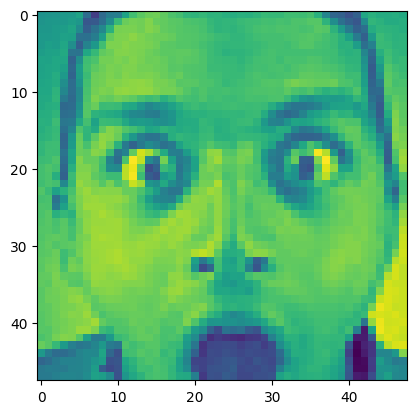

In [21]:
from keras.utils import load_img
img = load_img("/content/archive/test/surprise/PrivateTest_1338609.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [57]:
predictions =model2.predict(test_set)

57/57 [==============================] - 3s 60ms/step


In [61]:
np.argmax(predictions[0])

5

In [22]:
##---------Type the code below this line------------------##
from keras.utils import img_to_array
test_image = img_to_array(img)
test_image = np.expand_dims(test_image, axis = 0)
result = model2.predict(test_image)
result[0]

1/1 [==============================] - 9s 9s/step


array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [23]:
res = np.argmax(result[0])

In [88]:
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [24]:
print('predicted Label for that image is: {}'.format(class_names[res]))

predicted Label for that image is: surprise


# 7. Report the result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


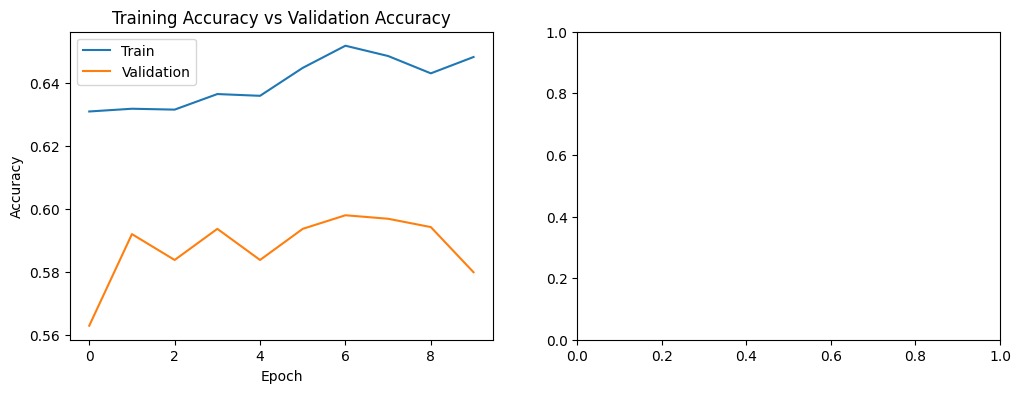

In [78]:
# Plot the training and validation accuracy history
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

# ax[1].plot(history.history['loss'])
# ax[1].plot(history.history['val_loss'])
# ax[1].set_title('Training Loss vs Validation Loss')
# ax[1].set_ylabel('Loss')
# ax[1].set_xlabel('Epoch')
# ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()


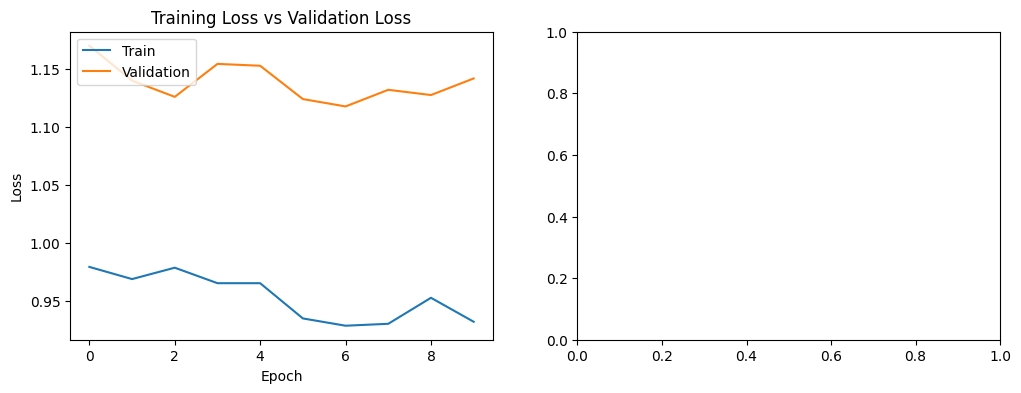

In [80]:
# Plot the training and validation loss history
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Training Loss vs Validation Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [81]:

# the testing accuracy and loss
# Evaluate the model on the test data
test_loss, test_accuracy   = model2.evaluate(test_set)


print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)



57/57 [==============================] - 6s 107ms/step - loss: 1.1419 - accuracy: 0.5798
Test Loss: 1.1418792009353638
Test Accuracy: 0.5798272490501404


In [25]:
# class lables of all test images
test_labels = []
class_labels =[]
for i, class_name in enumerate(os.listdir(test_dir)):
        class_dir = os.path.join(test_dir, class_name)
        class_labels.append(i)
        class_labels=class_labels * len(os.listdir(class_dir))
        test_labels.extend(class_labels)
        class_labels =[]



In [21]:
# Get model predictions on the test data
y_pred = model2.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)

57/57 [==============================] - 126s 2s/step


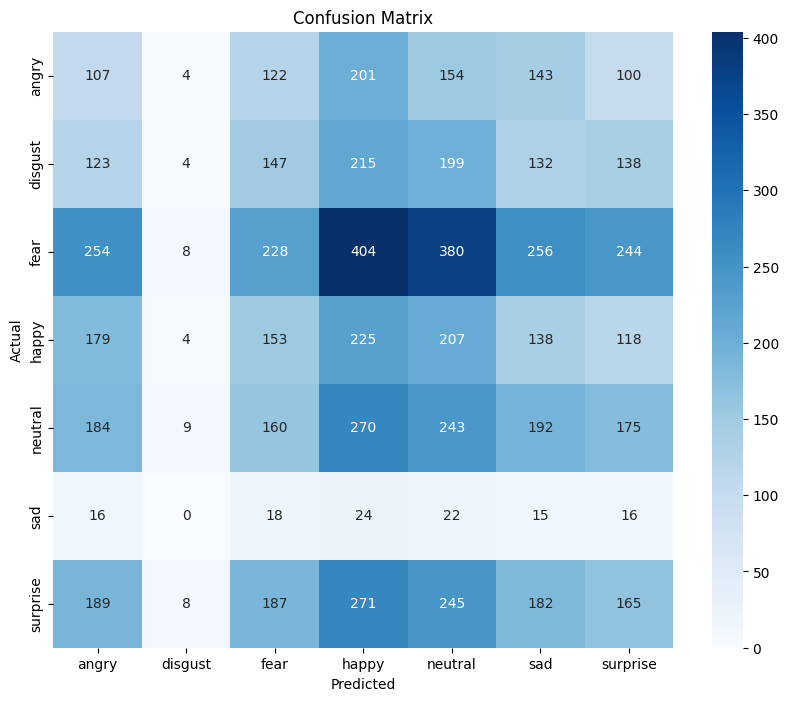

In [27]:

# Create the confusion matrix
confusion_mtx = confusion_matrix(test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [29]:
# Generate the classification report
from sklearn.metrics import classification_report

report = classification_report(test_labels, y_pred_classes, target_names=class_names)

# Print the classification report
print(report)

              precision    recall  f1-score   support

       angry       0.10      0.13      0.11       831
     disgust       0.11      0.00      0.01       958
        fear       0.22      0.13      0.16      1774
       happy       0.14      0.22      0.17      1024
     neutral       0.17      0.20      0.18      1233
         sad       0.01      0.14      0.03       111
    surprise       0.17      0.13      0.15      1247

    accuracy                           0.14      7178
   macro avg       0.13      0.14      0.12      7178
weighted avg       0.16      0.14      0.14      7178



### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck